<a href="https://colab.research.google.com/github/Swarn36/Data_Analysis/blob/main/Ad_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Overview

A/B testing helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers. Find the dataset [here](https://statso.io/a-b-testing-case-study/)

Here is a dataset based on A/B testing submitted by [İlker Yıldız](https://www.kaggle.com/ilkeryildiz) on Kaggle.

---


Below are all the features in the dataset:

1. Campaign Name: The name of the campaign
2. Date: Date of the record
3. Spend: Amount spent on the campaign in dollars
4. of Impressions: Number of impressions the ad crossed through the campaign
5. Reach: The number of unique impressions received in the ad
6. of Website Clicks: Number of website clicks received through the ads
7. of Searches: Number of users who performed searches on the website
8. of View Content: Number of users who viewed content and products on the website
9. of Add to Cart: Number of users who added products to the cart
10. of Purchase: Number of purchases

---



Two campaigns were performed by the company:

1. Control Campaign
2. Test Campaign

Perform A/B testing to find the best campaign for the company to get more customers.

#Data Preparation

Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# data gathering
control = pd.read_csv('/content/control_group.csv', sep=';')
test = pd.read_csv('/content/test_group.csv', sep=';')
control.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Control Campaign,26.08.2019,2233,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0
26,Control Campaign,27.08.2019,2061,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0
27,Control Campaign,28.08.2019,2421,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0
28,Control Campaign,29.08.2019,2375,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0
29,Control Campaign,30.08.2019,2324,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0


In [4]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


For A/B Testing we need atleast 20 observations so that we can minimize or maximize our effect size regarding the chi square impacts

In [3]:
import math
import numpy as np
from sklearn.impute import SimpleImputer
import scipy
from statsmodels.stats.contingency_tables import Table2x2
from statsmodels.stats.power import GofChisquarePower

Change the column name

In [4]:
control.columns = ["campaign_name", "date", "spend[USD]",
                        "count_impressions", "reach", "website_clicks",
                        "count_searches", "count_view_content", "add_to_cart",
                        "website_purchases"]

test.columns = ["campaign_name", "date", "spend[USD]",
                        "count_impressions", "reach", "website_clicks",
                        "count_searches", "count_view_content", "add_to_cart",
                        "website_purchases"]

In [9]:
#finding any null values in the control campaign
control.isnull().sum()

campaign_name         0
date                  0
spend[USD]            0
count_impressions     1
reach                 1
website_clicks        1
count_searches        1
count_view_content    1
add_to_cart           1
website_purchases     1
dtype: int64

In [5]:
# to fill the null values with the mean values of the respective columns
ss = SimpleImputer()
control_1 = ss.fit_transform(control.drop(columns=["campaign_name", "date"]))

control_1 = pd.DataFrame(control_1)
control_1.columns = ["spend[USD]",
                        "count_impressions", "reach", "website_clicks",
                        "count_searches", "count_view_content", "add_to_cart",
                        "website_purchases"]

control_1[["campaign_name", "date"]] = control[["campaign_name", "date"]]
control_1.head()

,spend[USD],count_impressions,reach,website_clicks,count_searches,count_view_content,add_to_cart,website_purchases,campaign_name,date
0,2280.0,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000,Control Campaign,1.08.2019
1,1757.0,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000,Control Campaign,2.08.2019
2,2343.0,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000,Control Campaign,3.08.2019
3,1940.0,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000,Control Campaign,4.08.2019
4,1835.0,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103,Control Campaign,5.08.2019


Now both datasets will be merged to see the impacts

In [6]:
df = control_1.merge(test,
                             how="outer").sort_values(["date"])
df = df.reset_index(drop=True)
print(df.head())

   spend[USD]  count_impressions    reach  website_clicks  count_searches  \
0      2280.0            82702.0  56930.0          7016.0          2290.0   
1      3008.0            39550.0  35820.0          3038.0          1946.0   
2      2790.0            95054.0  79632.0          8125.0          2312.0   
3      2149.0           117624.0  91257.0          2277.0          2475.0   
4      2420.0            83633.0  71286.0          3750.0          2893.0   

   count_view_content  add_to_cart  website_purchases     campaign_name  \
0              2159.0       1819.0              618.0  Control Campaign   
1              1069.0        894.0              255.0     Test Campaign   
2              1804.0        424.0              275.0     Test Campaign   
3              1984.0       1629.0              734.0  Control Campaign   
4              2617.0       1075.0              668.0     Test Campaign   

         date  
0   1.08.2019  
1   1.08.2019  
2  10.08.2019  
3  10.08.2019  
4  11.

<ipython-input-6-6f1006a9c251>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = control_1.merge(test,


## Observations

We will see the difference impacts of the two campaigns

We need to look out for the website purchases, add to cart and website clicks and see to whom we can give the attention

##Impressions vs Amount

First look for the information we can get from the impressions and amount spent in two campaigns

In [25]:
fig = px.scatter(df,
                  x="count_impressions",
                  y="spend[USD]",
                  size="spend[USD]",
                  color= "campaign_name",
                 trendline="ols")

fig.update_layout(xaxis_title="Total Impressions", yaxis_title="Amount Spent in USD")
fig.show()

`Total Impressions is slightly higher in number in control campaign having a positive linear relationship while spending is higher in the test campaign`

Company spent money but did not get the desired amount of impressions as in the control campaign

##Impressions vs Website Clicks

Now we will see what percentage of impressions got into the reach and website clicks

In [26]:
df.head()

,spend[USD],count_impressions,reach,website_clicks,count_searches,count_view_content,add_to_cart,website_purchases,campaign_name,date
0,2280.0,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control Campaign,1.08.2019
1,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,Test Campaign,1.08.2019
2,2790.0,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,Test Campaign,10.08.2019
3,2149.0,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,Control Campaign,10.08.2019
4,2420.0,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,Test Campaign,11.08.2019


In [27]:
# creating two extra columns for the percentage convertions
df['reach_per_impression'] = round(df['reach'] / df['count_impressions'], 2)
df['clicks_per_reach'] = round(df['website_clicks']/ df['reach'], 2)


In [28]:
# creating two subsets if needed
df_control = df[df['campaign_name'] == 'Control Campaign']
df_test = df[df['campaign_name'] == 'Test Campaign']

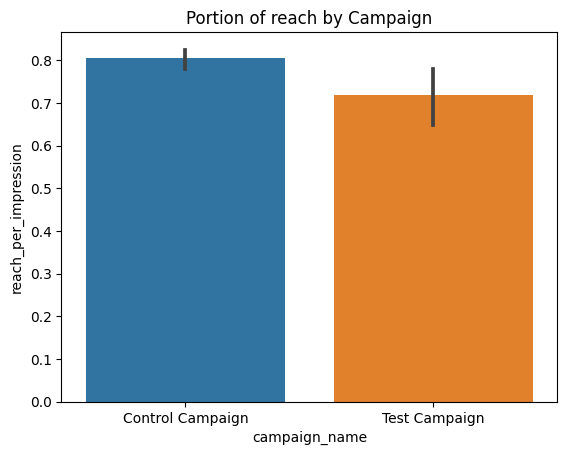

In [33]:
# bar plot showing the effects of reach per impression in each campaign
sns.barplot(df,
            x = df['campaign_name'],
            y = df["reach_per_impression"])
plt.title("Portion of reach by Campaign")
plt.show();

Reach is higher in the control group

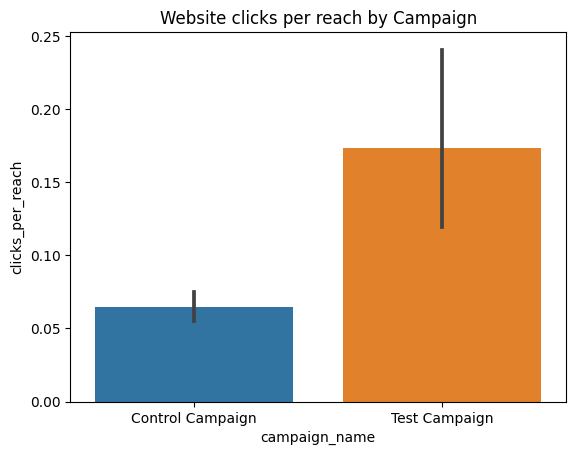

In [31]:
# website clicks in each campaign
sns.barplot(df,
            x = df['campaign_name'],
            y = df["clicks_per_reach"])
plt.title("Website clicks per reach by Campaign")
plt.show();

Wow a great difference we can see here.
`Though the reach per impressions is slightly better in control campaign but the website clicks is far greater than that of the control campaign`. That's why I took the percentage convertions not the actual numbers in the calculation.

##Convertion to Purchase from Clicks

Now we will see in which campaign we got our best shots

In [34]:
df['puchase_per_clicks'] = round(df['website_purchases'] / df['website_clicks'], 2)
df['add_to_cart_per_clicks'] = round(df['add_to_cart'] / df['website_clicks'], 2)
df['puchase_per_add_to_cart'] = round(df['website_purchases'] / df['add_to_cart'], 2)

In [40]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_bar(y=df['add_to_cart_per_clicks'], x=df['campaign_name'], name = 'Add to Cart per clicks')
fig.add_bar(y=df['puchase_per_clicks'], x=df['campaign_name'], name='Purchase per Clicks')
fig.add_bar(y=df['puchase_per_add_to_cart'], x=df['campaign_name'], name='Purchase from Add to cart')
fig.update_layout(barmode="relative")
fig.show();

From the above graph, we see in `Test Campaign` website conversions is great. One can click in the color to compare the metrics for each campaign.

In [41]:
fig = px.bar(df, x=df['puchase_per_add_to_cart'], y=df['campaign_name'], color=df['spend[USD]'], title="Website Purchases from Add to Cart")
fig.show()

In [9]:
df.head()

,spend[USD],count_impressions,reach,website_clicks,count_searches,count_view_content,add_to_cart,website_purchases,campaign_name,date
0,2280.0,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Control Campaign,1.08.2019
1,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,Test Campaign,1.08.2019
2,2790.0,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,Test Campaign,10.08.2019
3,2149.0,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,Control Campaign,10.08.2019
4,2420.0,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,Test Campaign,11.08.2019


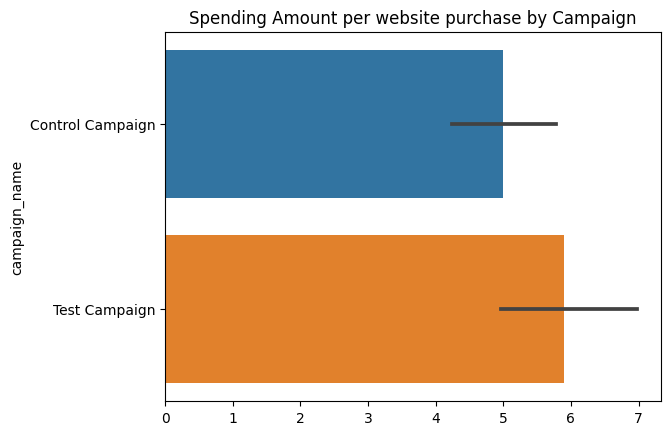

In [10]:
# Ad spent by website purchases in each campaign
sns.barplot(df,
            y = df['campaign_name'],
            x = df["spend[USD]"] / df['website_purchases'])
plt.title("Spending Amount per website purchase by Campaign")
plt.show();

So we can say that even if `Test Campaign` converts into more purchases but in term of profit generation `Control Campaign` holds the place by a few margin.

In [16]:
df['campaign_name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: campaign_name, dtype: int64

In [17]:
df['add_to_cart'].describe()

count      60.000000
mean     1090.766667
std       427.427479
min       278.000000
25%       863.250000
50%      1082.500000
75%      1384.250000
max      1913.000000
Name: add_to_cart, dtype: float64

## Chi-square test

First, instantiate a GofChisquarePower object and assign it to the variable name chi_square_power. Then use it to calculate the group_size needed to detect a small effect size of 0.09, with an alpha of 0.05 and power of 0.8.

In [18]:
chi_square_power = GofChisquarePower()
group_size = math.ceil(chi_square_power.solve_power(effect_size=0.09, alpha=0.05, power=0.8))

print("Group size:", group_size)
print("Total # of applicants needed:", group_size * 2)

Group size: 969
Total # of applicants needed: 1938


### For the Control Group

In [19]:
# for add to carts from control groups

df_atc_control = control_1['add_to_cart']

mean = df_atc_control.describe()['mean']
std = df_atc_control.describe()['std']
print("add_to_cart mean:", mean)
print("add_to_cart std:", std)

add_to_cart mean: 1300.0
add_to_cart std: 400.3712070669866


Let's see for how many days do I have to run the campaign

In [20]:
exp_days = 3
sum_mean = mean * exp_days
sum_std = std * np.sqrt(exp_days)
print("Mean of sum:", sum_mean)
print("Std of sum:", sum_std)

Mean of sum: 3900.0
Std of sum: 693.4632725277003


In [21]:
prob_2000_or_fewer = scipy.stats.norm.cdf(
                                        group_size * 2,
                                        loc=sum_mean,
                                        scale=sum_std
)
prob_2000_or_greater = 1-prob_2000_or_fewer

print(
    f"Probability of getting atleast 2000 add to carts in {exp_days} days:",
    round(prob_2000_or_greater, 3),
)

Probability of getting atleast 2000 add to carts in 3 days: 0.998


###For The Test Campaign

In [22]:
# for add to carts from test groups

df_atc_test = test['add_to_cart']

mean = df_atc_test.describe()['mean']
std = df_atc_test.describe()['std']
print("add_to_cart mean:", mean)
print("add_to_cart std:", std)

add_to_cart mean: 881.5333333333333
add_to_cart std: 347.584247622648


In [23]:
exp_days = 5
sum_mean = mean * exp_days
sum_std = std * np.sqrt(exp_days)
print("Mean of sum:", sum_mean)
print("Std of sum:", sum_std)

Mean of sum: 4407.666666666666
Std of sum: 777.2220055923606


In [24]:
prob_2000_or_fewer = scipy.stats.norm.cdf(
                                        group_size * 2,
                                        loc=sum_mean,
                                        scale=sum_std
)
prob_2000_or_greater = 1-prob_2000_or_fewer

print(
    f"Probability of getting atleast 2000 add to carts in {exp_days} days:",
    round(prob_2000_or_greater, 3),
)

Probability of getting atleast 2000 add to carts in 5 days: 0.999


I need to run the test campaign two more days regarding the `add_to_cart`